# Grouping - Imputation

Aka filling in missing values

Let's continue using the sales data:
https://www.kaggle.com/c/rossmann-store-sales/data

This is not filling in missing data in a group by, its using group by to more intelligently fill in missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfo = pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Lets say that some annoying compute malfunction has corrupted 10% of our sales data, and set it to NaN. First, lets look at the data.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


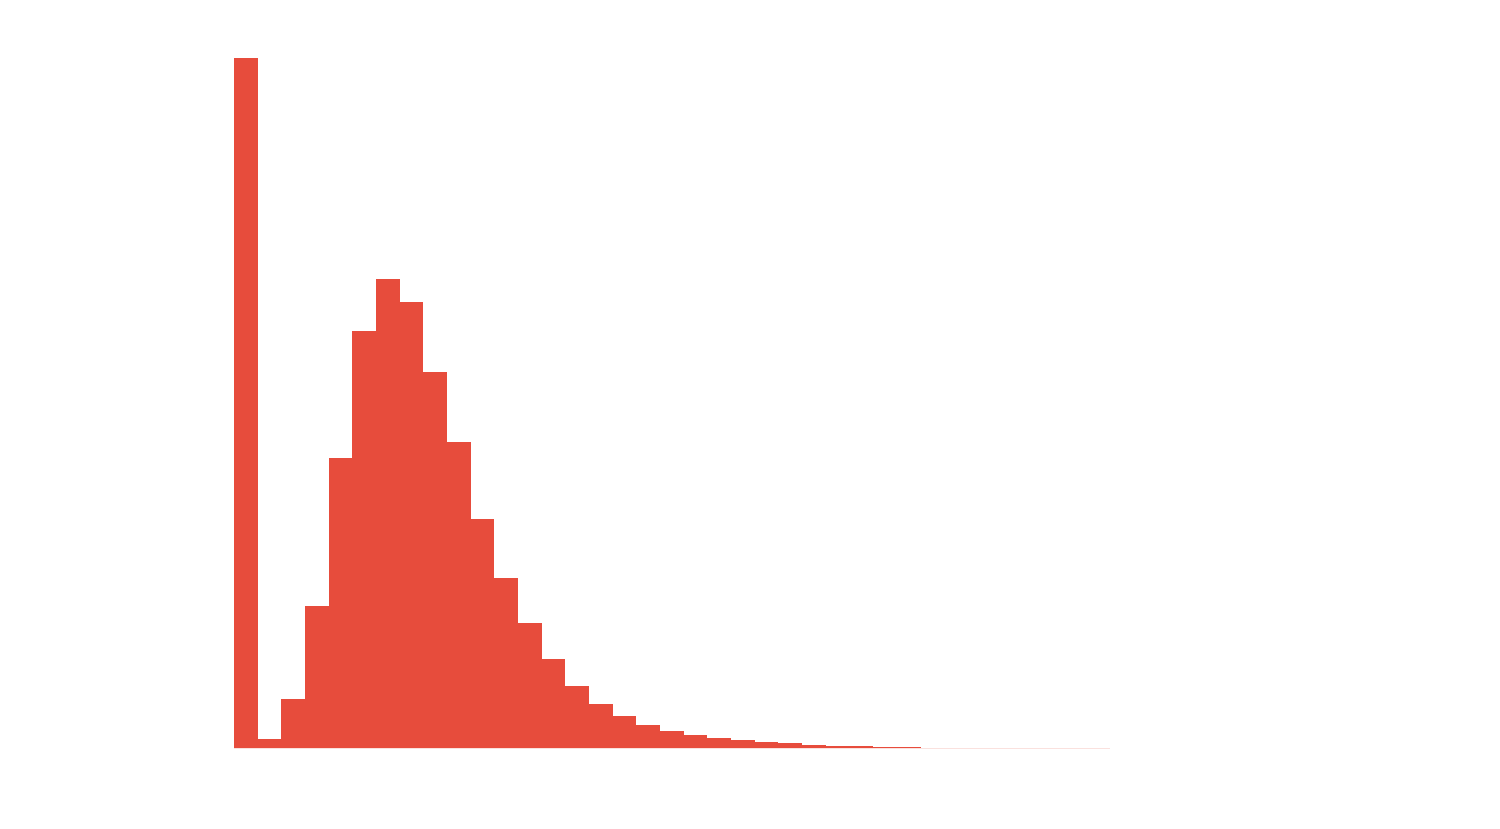

In [2]:
plt.hist(dfo.Sales);

(844392, 9)


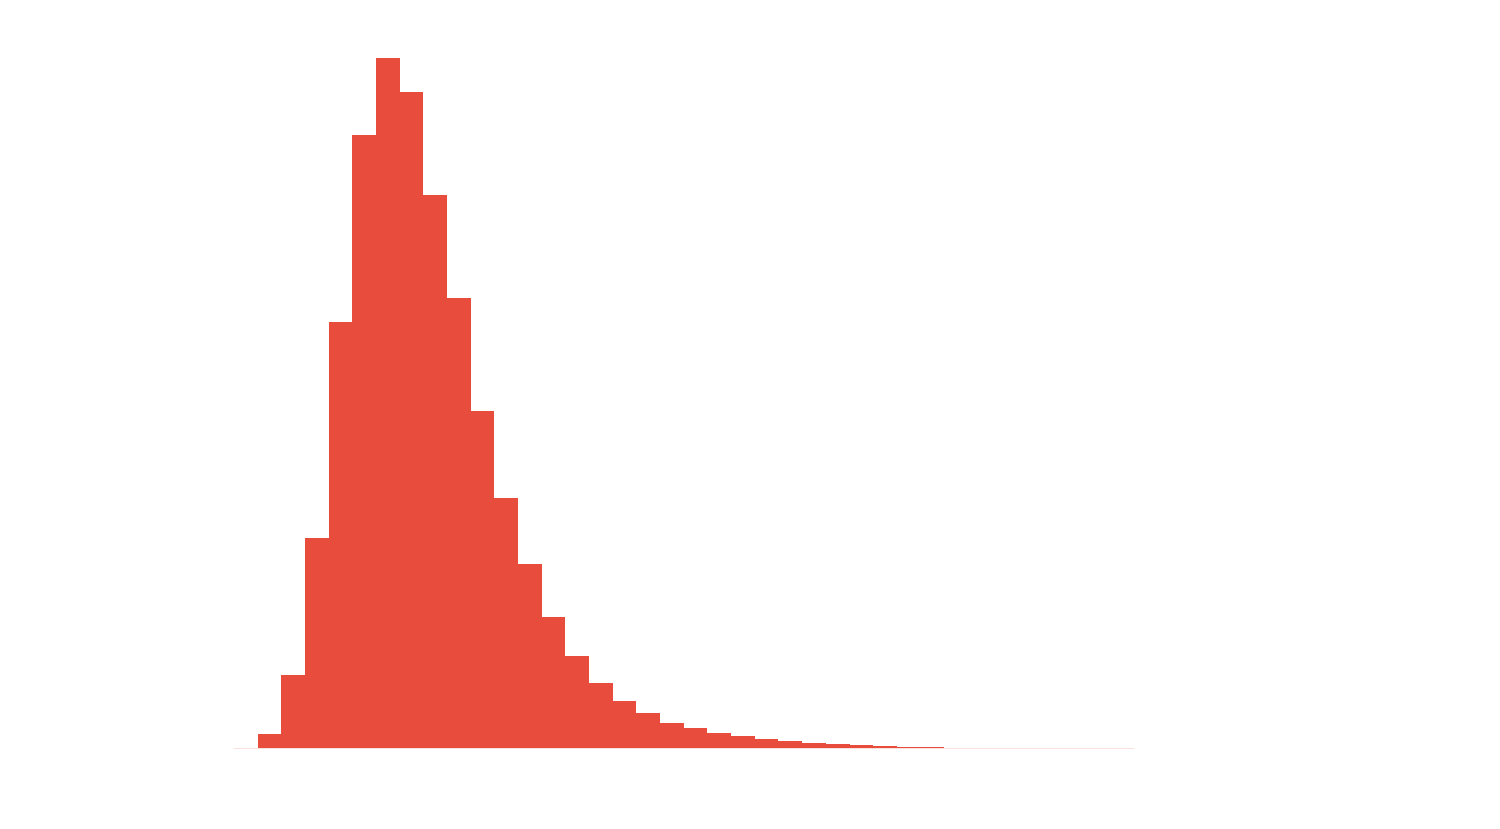

In [3]:
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape);

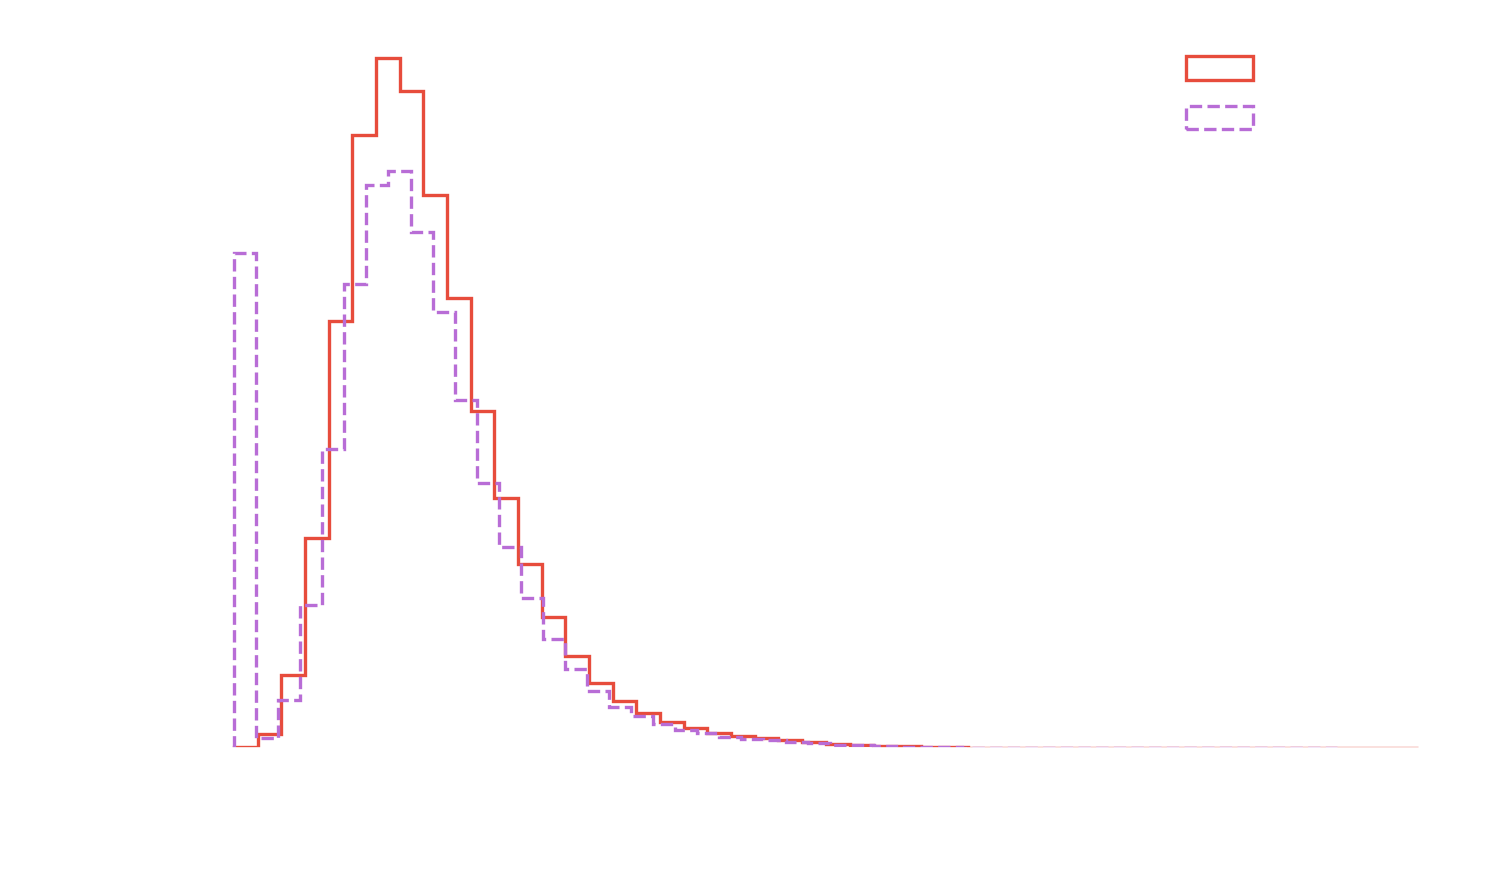

In [5]:
mask = np.random.choice(10, size=df.shape[0]) == 0
df["NewSales"] = df.Sales.copy()
df.loc[mask, "NewSales"] = np.nan

plt.hist(df.Sales, label="Original", histtype="step")
plt.hist(df.NewSales.fillna(0), label="Corrupted", histtype="step")
plt.legend(), plt.xlabel("Sales");

Lets see what happens if we just fill with the mean, and we'll use a new function, `transform`. Transform is similar to apply, but it has to return a series the same size as the input.

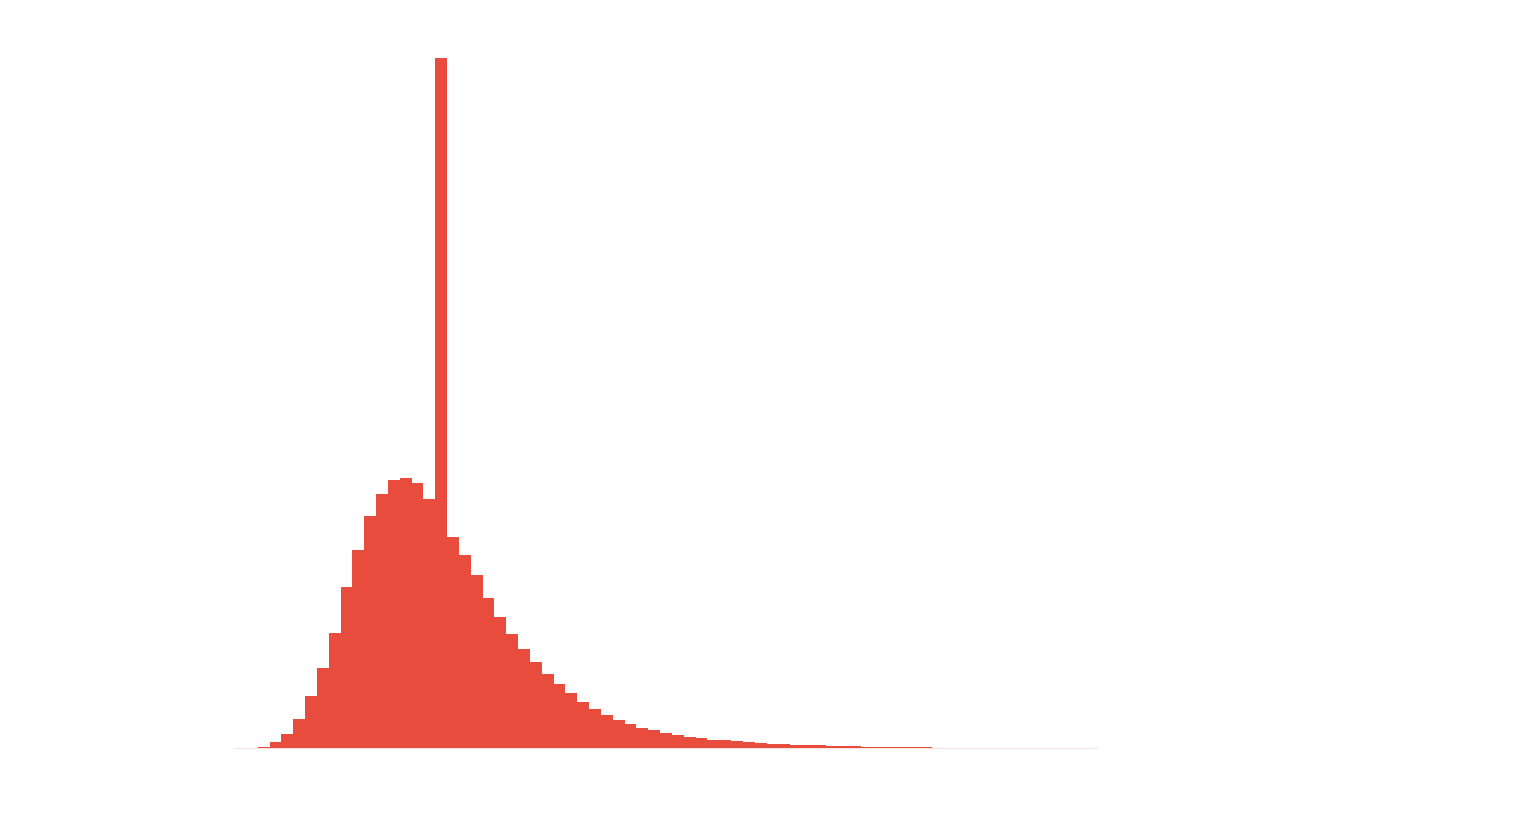

In [6]:
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100);

Not the best...

From previous examples, we know that some stores are far above others, and that sales vary significantly over the day of week. But maybe its good enough if we take those two factors into consideration.

In [6]:
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5326.0
      2          4640.5      549.5   1.0    1.0            0.0    4602.0
      3          4549.5      533.0   1.0    1.0            0.0    4549.5
      4          4380.0      525.0   1.0    1.0            0.0    4356.0
      5          4651.0      552.0   1.0    1.0            0.0    4611.0

Now to utilise `transform` again, this time on the group! Unlike apply or similar functions, transform requires that the output size is the same as in the input. So no condensing down numbers. You can think of it like aggregating to get a single number, but then backfilling it according to the correct group.

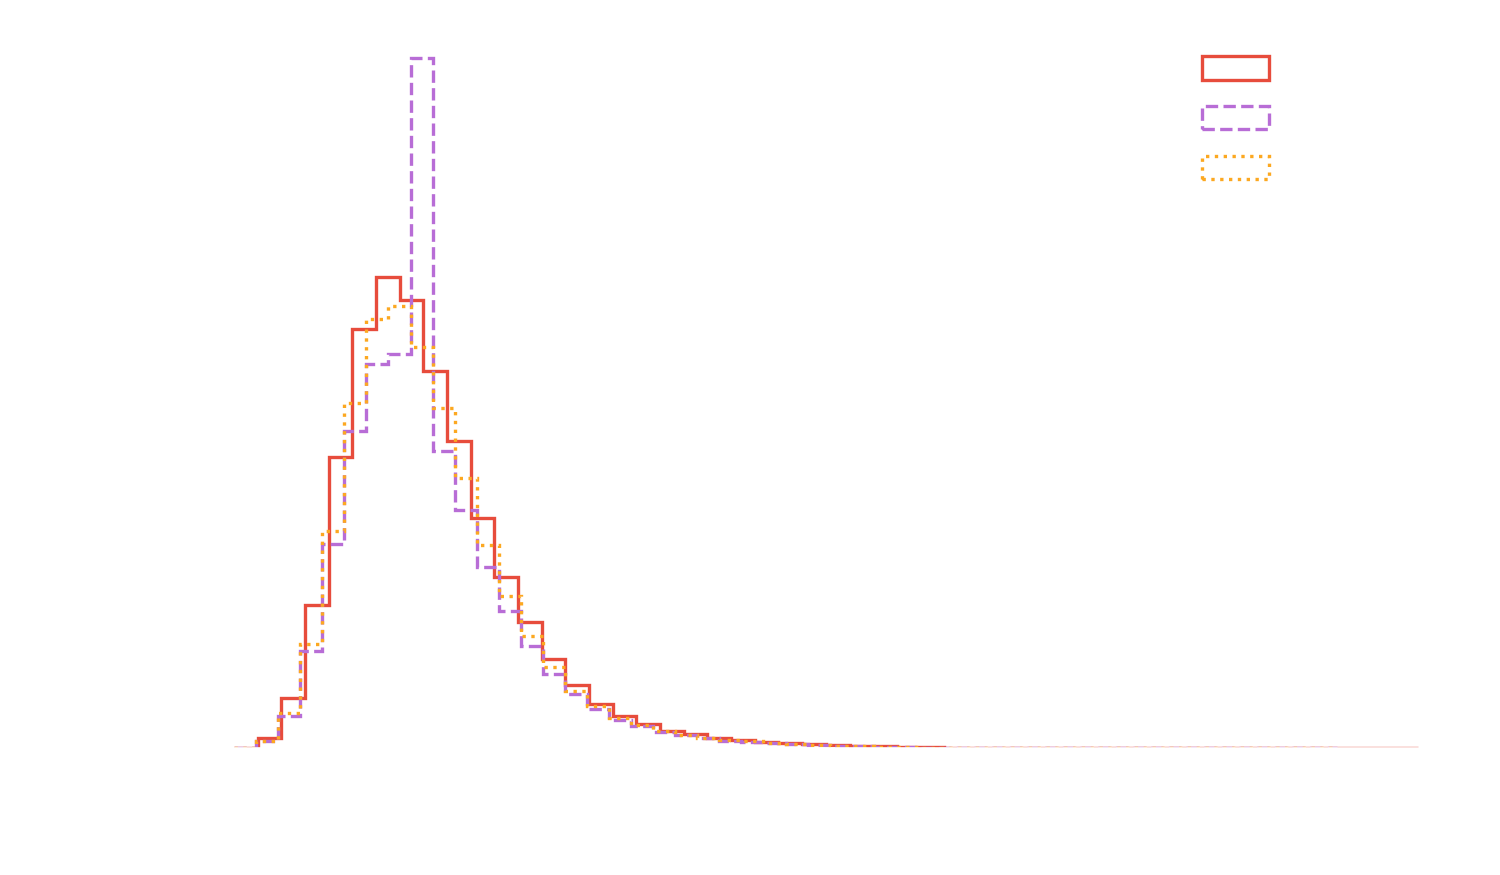

In [7]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {"histtype": "step", "bins": 50}
plt.hist(df.Sales, label="Original", **opts)
plt.hist(test_fix, label="Naive Fix", **opts)
plt.hist(test_fix2, label="This fix", **opts)
plt.legend(), plt.xlabel("Sales");

Perfect! We could improve this even further if we wanted. Sales is a skewed distribution, so better for us to use the median than the mean. The performance of the previous days - above or below the mean - might be a good indicator for performance. But now we're heading into machine learning territory, which is too vast a topic to cover here!

### Recap
* Use known relationships and group by to do smarter imputation
* transformation is new

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object